<a href="https://colab.research.google.com/github/cyxCHENYUXUAN/clyginxiut/blob/Digital-Image-Processing/%E6%95%B0%E9%87%8F%E6%A3%80%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. 读取图片

In [ ]:
path='/content/22098804650_22065685.jpg'

In [ ]:
image = cv2.imread(path)

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

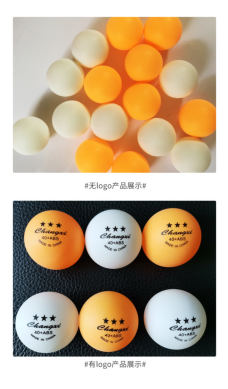

In [ ]:
plt.imshow(image_rgb,cmap='gray')
plt.axis('off')
plt.show()

# 2. 无Logo图片

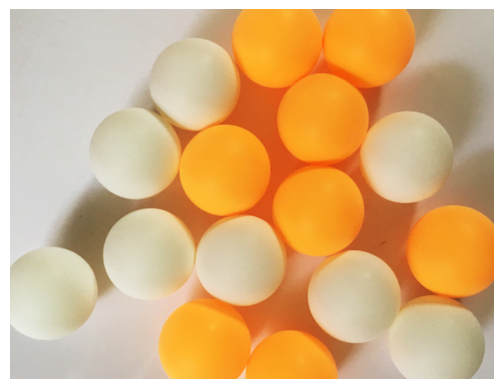

In [ ]:
no_logo_image = image_rgb[32:615, 12:775]
plt.imshow(no_logo_image,cmap='gray')
plt.axis('off')
plt.show()

在无Logo图片上加上9*9的高斯模糊

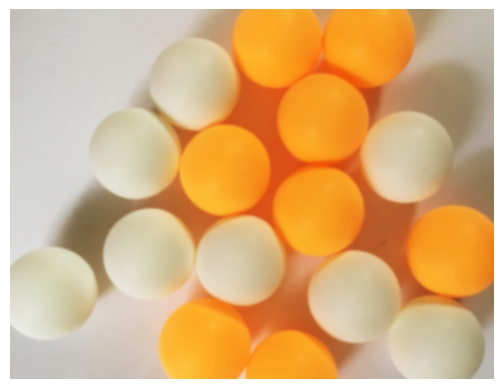

In [ ]:
blurred = cv2.GaussianBlur(no_logo_image, (9, 9), 0)
plt.imshow(blurred)
plt.axis('off')
plt.show()

将加上高斯模糊后的无Logo图片转换为HSV颜色通道，进行颜色分割

In [ ]:
hsv = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)

## 2.1 分割黄色乒乓球

In [ ]:
low_orange = np.array([13,193,240])
high_orange = np.array([20, 234, 255])
mask = cv2.inRange(hsv, low_orange, high_orange)

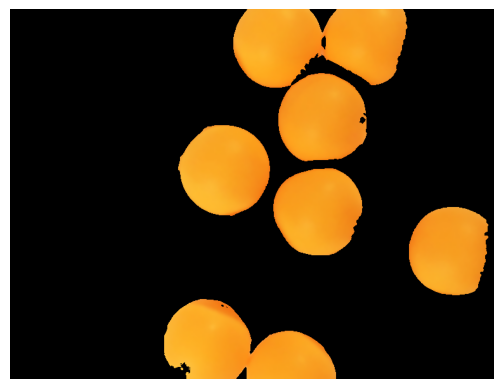

In [ ]:
res = cv2.bitwise_and(blurred, blurred, mask=mask)
plt.imshow(res)
plt.axis('off')
plt.show()

可以看到有的乒乓球粘连在一起，这影响了后续的连通域分析，对图片进行多次腐蚀后再进行一次膨胀可以将每一个乒乓球分离开来，效果如下

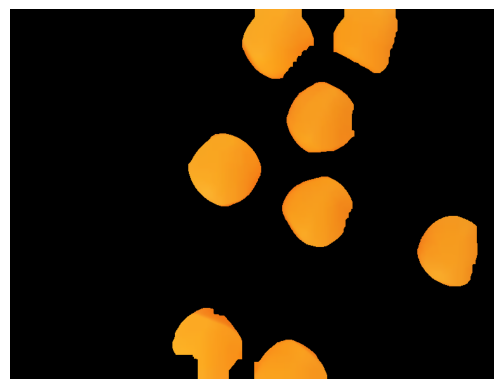

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

erosion = cv2.erode(res, kernel, iterations = 4)
dilation = cv2.dilate(erosion, kernel, iterations = 1)

plt.imshow(dilation)
plt.axis('off')
plt.show()

Canny边缘检测

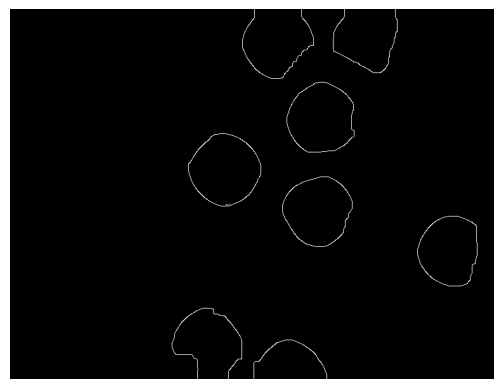

In [ ]:
edges = cv2.Canny(dilation, 50, 100)

plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
num_labels,_,_,_ = cv2.connectedComponentsWithStats(edges, connectivity=8)
num_labels

11

正确的数量应该是9（背景也算一个），错误原因可能是仍然有部分边缘没有连通，可以再进行一次膨胀

In [ ]:
dilation1 = cv2.dilate(edges,kernel,1)

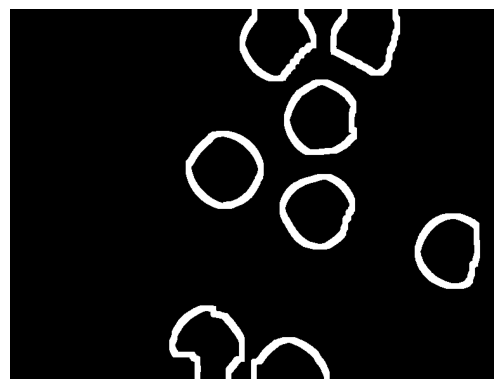

In [ ]:
plt.imshow(dilation1,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
num_labels_orange,_,_,_ = cv2.connectedComponentsWithStats(dilation1, connectivity=8)
num_labels_orange

9

得到8个黄色乒乓球

## 2.2 分割白色乒乓球

In [ ]:
low_white = np.array([15,15,195])
high_white = np.array([31, 83, 233])
mask = cv2.inRange(hsv, low_white, high_white)

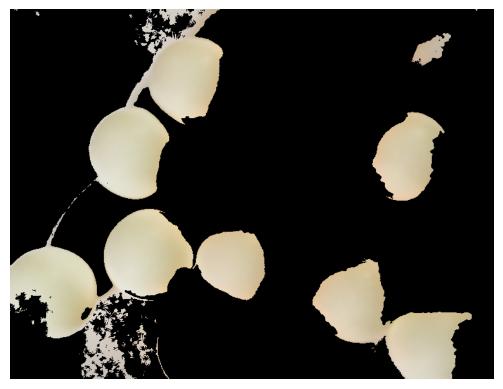

In [ ]:
res1 = cv2.bitwise_and(blurred, blurred, mask=mask)
plt.imshow(res1)
plt.axis('off')
plt.show()

腐蚀多次将每一个乒乓球分离开来

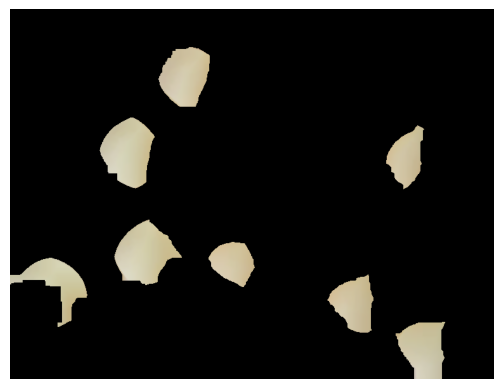

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))

erosion = cv2.erode(res1, kernel, iterations = 3)

plt.imshow(erosion)
plt.axis('off')
plt.show()

Canny边缘检测

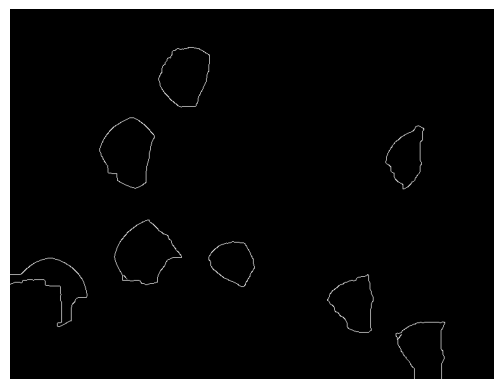

In [ ]:
edges = cv2.Canny(erosion, 50, 100)
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
num_labels,_,_,_ = cv2.connectedComponentsWithStats(edges, connectivity=8)
num_labels

10

数量不对，可能有部分边缘没有连通，可以再进行一次膨胀

In [ ]:
dilation2 = cv2.dilate(edges,kernel,1)

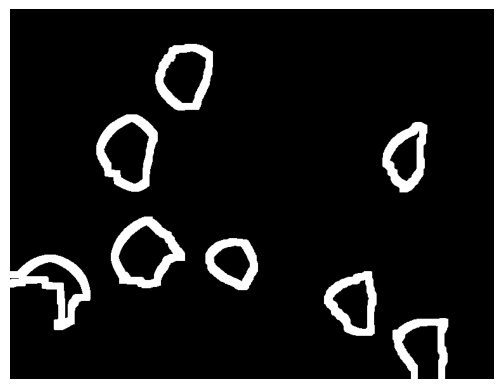

In [ ]:
plt.imshow(dilation2,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
num_labels_white,_,_,_ = cv2.connectedComponentsWithStats(dilation2, connectivity=8)
num_labels_white

9

得到8个白色乒乓球

将黄色乒乓球和白色乒乓球数量相加得到乒乓球的总数

In [ ]:
num_labels1 = (num_labels_orange - 1) + (num_labels_white - 1)
print(f'无Logo的乒乓球一共有{num_labels1}个')

无Logo的乒乓球一共有16个


# 3. 有Logo图片

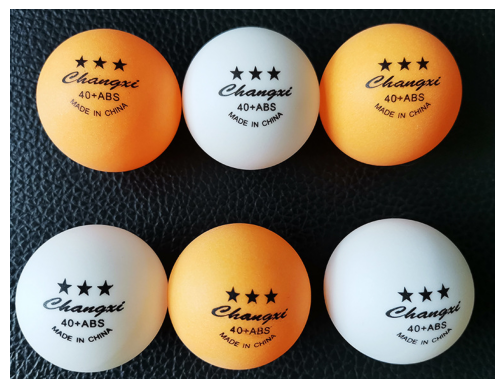

In [ ]:
with_logo_image = image_rgb[731:1313, 12:775]
plt.imshow(with_logo_image)
plt.axis('off')
plt.show()

转为灰度图像用于后续边缘检测

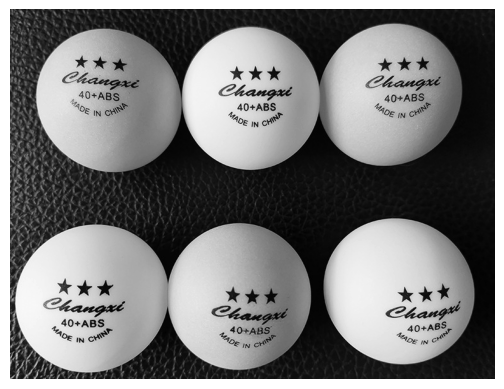

In [ ]:
img_gray = cv2.cvtColor(with_logo_image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

在灰度图像上加上9*9的高斯模糊

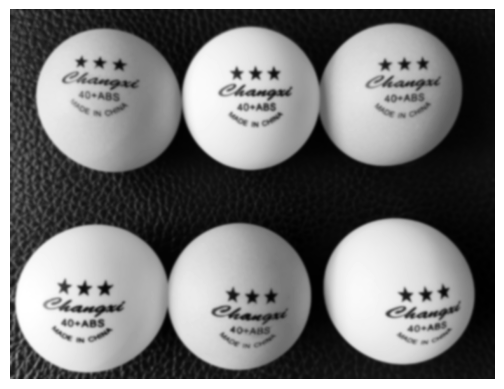

In [ ]:
blurred = cv2.GaussianBlur(img_gray, (9, 9), 0)
plt.imshow(blurred,cmap='gray')
plt.axis('off')
plt.show()

使用cv2.threshold将灰度图像转为二值图像

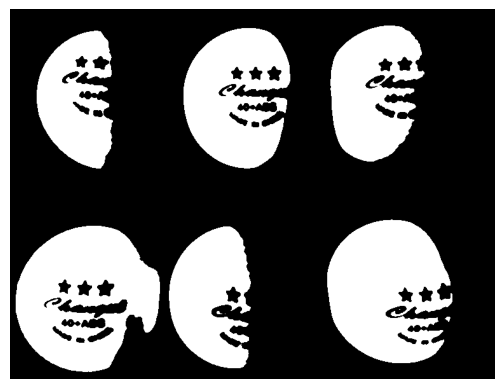

In [ ]:
ret,binary = cv2.threshold(blurred,165,255,cv2.THRESH_BINARY)
plt.imshow(binary,cmap='gray')
plt.axis('off')
plt.show()

进行适当的腐蚀膨胀

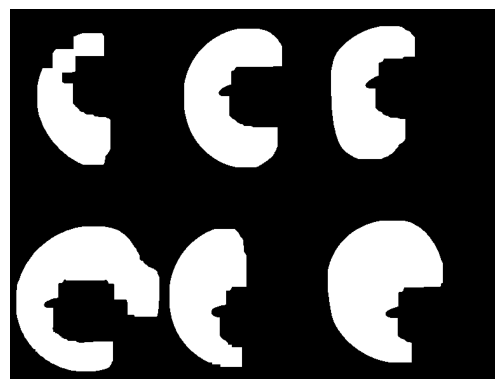

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))

erosion = cv2.erode(binary, kernel, iterations = 3)
dilation = cv2.dilate(erosion, kernel, iterations = 3)

plt.imshow(dilation,cmap='gray')
plt.axis('off')
plt.show()

Canny边缘检测

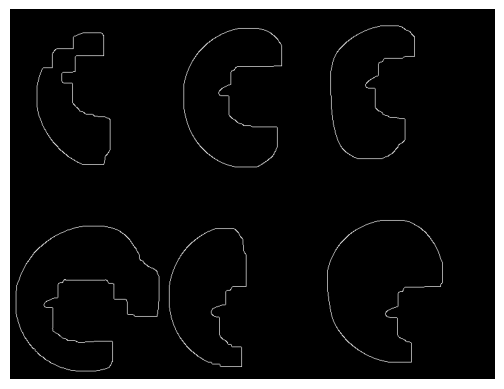

In [ ]:
edges = cv2.Canny(dilation, 50, 100)
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
num_labels2,_,_,_ = cv2.connectedComponentsWithStats(edges, connectivity=8)
print(f'有Logo的乒乓球一共有{num_labels2-1}个')

有Logo的乒乓球一共有6个
